In [ ]:
"""
run.py: script for executing main functionality of component_separation

"""

__author__ = "S. Belkner"

import os
import sys
import numpy as np
import platform
import json
import component_separation.io as io
import component_separation.run as csr
from component_separation.cs_util import Planckf, Plancks

uname = platform.uname()
if uname.node == "DESKTOP-KMIGUPV":
    mch = "XPS"
else:
    mch = "NERSC"
    
with open('config.json', "r") as f:
    cf = json.load(f)
PLANCKMAPFREQ = [p.value for p in list(Planckf)]
PLANCKSPECTRUM = [p.value for p in list(Plancks)]
lmax = cf['pa']["lmax"]
lmax_mask = cf['pa']["lmax_mask"]
freqfilter = cf['pa']["freqfilter"]
specfilter = cf['pa']["specfilter"]

num_sim = cf['pa']["num_sim"]

spec_path = cf[mch]['outdir']
indir_path = cf[mch]['indir']

freqcomb =  [
    "{}-{}".format(FREQ,FREQ2)
        for FREQ in PLANCKMAPFREQ
        if FREQ not in freqfilter
        for FREQ2 in PLANCKMAPFREQ
        if (FREQ2 not in freqfilter) and (int(FREQ2)>=int(FREQ))]
speccomb  = [spec for spec in PLANCKSPECTRUM if spec not in specfilter]

filename = io.make_filenamestring(cf)

if cf['pa']['new_spectrum']:
    spectrum = csr.map2spec(io.load_plamap(cf['pa']), freqcomb)
    io.save_spectrum(spectrum, spec_path, 'unscaled'+filename)
else:
    path_name = spec_path + 'spectrum/unscaled' + filename
    spectrum = io.load_spectrum(path_name=path_name)
if spectrum is None:
    spectrum = csr.map2spec(io.load_plamap(cf['pa']), freqcomb)
    io.save_spectrum(spectrum, spec_path, 'unscaled'+filename)

spectrum_scaled = csr.spec2specsc(spectrum, freqcomb)
io.save_spectrum(spectrum_scaled, spec_path, 'scaled'+filename)

weights = csr.specsc2weights(spectrum_scaled, cf["pa"]["offdiag"])
io.save_weights(weights, spec_path, 'weights'+filename)

freqcomb =  [
    "{}-{}".format(FREQ,FREQ2)
        for FREQ in PLANCKMAPFREQ
        if FREQ not in freqfilter
        for FREQ2 in PLANCKMAPFREQ
        if (FREQ2 not in freqfilter) and (int(FREQ2)==int(FREQ))]

if cf['pa']["run_sim"]:
    for i in range(num_sim):
        print("Starting simulation {} of {}.".format(i+1, num_sim))
        path_name = spec_path + 'spectrum/unscaled' + filename
        spectrum = io.load_spectrum(path_name=path_name)

        synmap = csr.spec2synmap(spectrum, freqcomb)
        io.save_map(synmap, spec_path, "syn/unscaled-"+str(i)+"_synmap-"+filename)

        syn_spectrum = csr.map2spec(synmap, freqcomb)
        # io.save_spectrum(syn_spectrum, spec_path, "syn/unscaled-"+str(i)+"_synspec-"+filename)

        syn_spectrum_scaled = csr.spec2specsc(syn_spectrum, freqcomb)
        io.save_spectrum(syn_spectrum_scaled, spec_path, "syn/scaled-"+str(i)+"_synmap-"+filename)


    syn_spectrum_avgsc = csr.synmaps2average(filename)
    io.save_spectrum(syn_spectrum_avgsc, spec_path, "syn/scaled-" + "synavg-"+ filename)

# weights = specsc2weights(syn_spectrum_avg, False)
# io.save_weights(weights, spec_path, "syn/"+"SYNweights"+filename)

0 not invertible: [[ 0.  0.  0. -0. -0. -0.  0.]
 [ 0.  0.  0. -0. -0. -0.  0.]
 [ 0.  0.  0. -0. -0. -0.  0.]
 [-0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0.]
 [ 0.  0.  0. -0. -0. -0.  0.]]
0 not invertible: [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
1 not invertible: [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
0 not invertible: [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
1 not invertible: [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
0 not invertible

/global/homes/s/sebibel/.local/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/global/homes/s/sebibel/.local/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/global/homes/s/sebibel/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/s/sebibel/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/s/sebibel/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [2]:

import os
import sys
import numpy as np
import platform
import json
import component_separation.io as io
import component_separation.run as csr
from component_separation.cs_util import Planckf, Plancks


ImportError: No module named component_separation.io

Load data

freq=143
# /project/projectdirs/cmb/data/planck2018/pr3/Planck_L08_inputs/PR3vJan18_temp_lensingmask_gPR2_70_psPR2_143_COT2_smicadx12_smicapoldx12_psPR2_217_sz.fits.gz
# '/project/projectdirs/planck/data/compsep/exchanges/dx12/maps/hfi/%sGHz_ful.all_ful.RD12_RC4.P.fits'
mask = read_map('/project/projectdirs/cmb/data/planck2018/pr3/Planck_L08_inputs/PR3vJan18_temp_lensingmask_gPR2_70_psPR2_143_COT2_smicadx12_smicapoldx12_psPR2_217_sz.fits.gz',field= 0)
Q = read_map('/global/cfs/cdirs/cmb/data/planck2020/npipe/npipe6v20%s/npipe6v20%s_%03d_map.fits'%('A', 'A', 143),field= 1)

In [1]:
import numpy as np
import pandas as pd
from healpy.sphtfunc import smoothing
import smica
import os
import json
import component_separation
import component_separation.io as io
import healpy as hp
import component_separation.MSC.MSC.pospace as ps
import component_separation.powspec as pw
import component_separation.preprocess as prep
from component_separation.cs_util import Config as csu
from component_separation.cs_util import Constants as const
from component_separation.cs_util import Helperfunctions as hpf
from component_separation.cs_util import Planckf, Planckr, Plancks
import matplotlib.pyplot as plt
with open(os.path.dirname(component_separation.__file__)+'/config.json', "r") as f:
    cf = json.load(f)
    
import platform
uname = platform.uname()
if uname.node == "DESKTOP-KMIGUPV":
    mch = "XPS"
else:
    mch = "NERSC"

MSC: reverting to standard healpy


/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/pyfits/__init__.py:21: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  warnings.warn('PyFITS is deprecated, please use astropy.io.fits',


/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/he

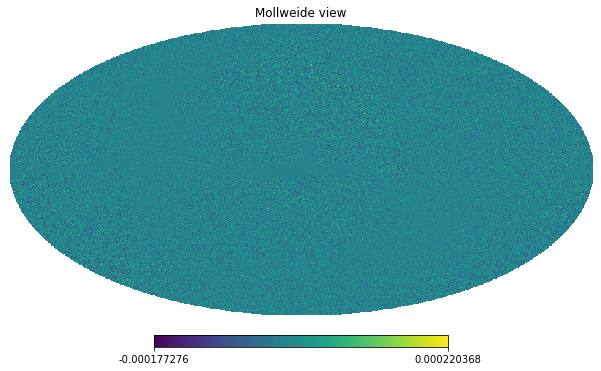

In [9]:
cmb_map_in = hp.read_map("/global/cfs/cdirs/cmb/data/planck2018/pr3/cmbmaps/dx12_v3_smica_cmb_raw.fits", field=1)
hp.mollview(cmb_map_in)
plt.show()

(6144,)


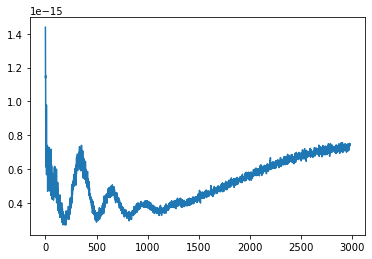

In [19]:
plt.plot(cmb_spec_in[20:3000])
print(cmb_spec_in.shape)

loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPEC0200_NPIPE_sim_lens_3000_6000_0_0_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npySMICA.npy


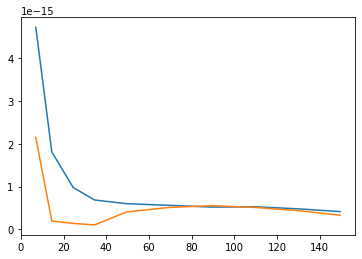

In [37]:
smica_spec = io.load_data(io.spec_sc_path_name+'SMICA.npy')[0,0,:]
# plt.xlim((10,30))
def bin_it(data, bins, offset=0):
    ret = np.ones(len(bins))
    for k in range(bins.shape[0]):
        ret[k] = np.mean(np.nan_to_num(data[int(bins[k][0]):int(bins[k][1])]))
    return np.nan_to_num(ret)
plt.plot(np.mean(const.SMICA_lowell_bins,axis=1), bin_it(cmb_spec_in, bins=const.SMICA_lowell_bins))
plt.plot(np.mean(const.SMICA_lowell_bins,axis=1), smica_spec*1e-12)
# plt.ylim((0,1e-5))


In [34]:
import numpy as np
import pandas as pd
from healpy.sphtfunc import smoothing
import smica
import os
import json
import component_separation
import component_separation.io as io
import healpy as hp
import component_separation.MSC.MSC.pospace as ps
import component_separation.powspec as pw
import component_separation.preprocess as prep
from component_separation.cs_util import Config as csu
from component_separation.cs_util import Constants as const
from component_separation.cs_util import Helperfunctions as hpf
from component_separation.cs_util import Planckf, Planckr, Plancks
import matplotlib.pyplot as plt
with open(os.path.dirname(component_separation.__file__)+'/config.json', "r") as f:
    cf = json.load(f)
    
import platform
uname = platform.uname()
if uname.node == "DESKTOP-KMIGUPV":
    mch = "XPS"
else:
    mch = "NERSC"
bins = const.linear_equisized_bins_100
signal = pd.read_csv(
        cf[mch]['powspec_truthfile'],
        header=0,
        sep='    ',
        index_col=0)
spectrum_trth = signal["Planck-"+"EE"].to_numpy()

def bin_it(data, bins, offset=0):
    ret = np.ones(len(bins))
    for k in range(bins.shape[0]):
        ret[k] = np.mean(np.nan_to_num(data[int(bins[k][0]):int(bins[k][1])]))
    return np.nan_to_num(ret)

<ipython-input-34-ece8d18711b8>:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  signal = pd.read_csv(


In [38]:
tf = io.load_data(cf[mch]['outdir_misc_ap']+"tf.npy")
pixwin = hp.sphtfunc.pixwin(2048, pol=True, lmax=1800)
cmb_in = io.load_data(cf[mch]['outdir_misc_ap']+"cmb_spec_in.npy")
smica_spec = io.load_data(io.spec_sc_path_name+'SMICA.npy')[0,0,:]
C_lN = io.load_data(io.noise_sc_path_name)
C_lS_bn =  spectrum_trth[:1800+1]/hpf.llp1e12(1800)*1e12


loaded /global/cscratch1/sd/sebibel/misc/tf.npy
loaded /global/cscratch1/sd/sebibel/misc/cmb_spec_in.npy
loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPEC0200_NPIPE_sim_lens_3000_6000_5_2_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npySMICA.npy
loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim_diff/SPEC0200_NPIPE_sim_diff_lens_3000_6000_5_2_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npy


In [39]:
C_lN['030-030']["EE"]
C_lS_bn

array([0.00000000e+00, 6.70803392e-08, 9.19646060e-08, ...,
       1.51774840e-05, 1.51931832e-05, 1.52108206e-05])

<ipython-input-40-bf834efc3eeb>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.mean(bins,axis=1), tf*1e-6/(hp.sphtfunc.gauss_beam(0.00145444, lmax=1800, pol=True)[1,::100]/pixwin[1][::100]))


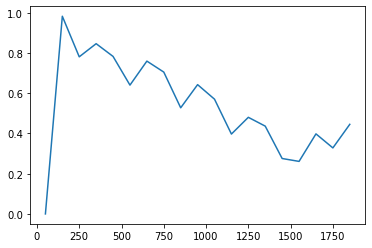

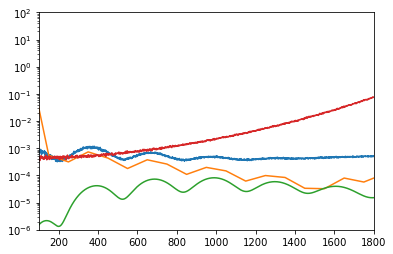

In [40]:
plt.plot(np.mean(bins,axis=1), tf*1e-6/(hp.sphtfunc.gauss_beam(0.00145444, lmax=1800, pol=True)[1,::100]/pixwin[1][::100]))
plt.show()
plt.plot(cmb_in[1,:]*1e12)
plt.plot(np.mean(bins,axis=1), smica_spec, label='smica out')
plt.plot(C_lS_bn)
plt.plot(C_lN['100-100']["EE"])
# plt.plot(pixwin[1][::100])
plt.xlim((100,1800))
plt.ylim((1e-6,1e2))
plt.yscale('log')

In [3]:
cmb_map_in = hp.read_map("/global/cfs/cdirs/cmb/data/planck2018/pr3/cmbmaps/dx12_v3_smica_cmb_raw.fits", field=(0,1,2))
cmb_spec_in = hp.anafast(cmb_map_in)

/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/he

loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPEC0200_NPIPE_sim_lens_3000_6000_5_2_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npySMICA.npy


In [ ]:
def bin_it(data, bins, offset=0):
    ret = np.ones(len(bins))
    for k in range(bins.shape[0]):
        ret[k] = np.mean(np.nan_to_num(data[int(bins[k][0]):int(bins[k][1])]))
    return np.nan_to_num(ret)

plt.plot(cmb_spec_in[1,:], label='planck cmb in')
plt.plot(np.mean(bins,axis=1), smica_spec*1e-12, label='smica out')
plt.plot(spectrum_trth)
plt.legend()
plt.ylim((1e-17,1e-14))
plt.yscale("log")

In [29]:
from astropy.io import fits
hdul = fits.open("/global/cfs/cdirs/cmb/data/planck2018/pr3/cmbmaps/dx12_v3_smica_cmb_raw.fits")